In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = path ="/content/drive/MyDrive/greproject/trial.csv"
df=pd.read_csv(path)
df



,Serial No,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
0,1,299,105.0,7.5,cse,3.74,0,1,3.0,250,2
1,2,303,98.0,7,cse,3.68,0,0,0.0,250,2
2,3,300,98.0,7,cse,3.68,0,0,1.0,250,2
3,4,310,98.0,7,cse,3.78,1,1,2.0,133,3
4,5,306,98.0,7,cse,3.00,0,3,1.0,133,3
...,...,...,...,...,...,...,...,...,...,...,...
380,381,323,105.0,7.5,cse,3.78,0,0,0.0,67,4
381,382,320,105.0,7.5,cse,3.65,0,0,3.0,67,4
382,383,317,114.0,8,cse,3.81,0,1,2.0,67,4
383,384,324,94.0,6.5,cse,3.68,0,0,2.5,67,4


In [ ]:

df.describe(include='all')


,Serial No,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
count,385.000000,385.000000,385.000000,385,385,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,7,cse,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,110,206,NaN,NaN,NaN,NaN,NaN,NaN
mean,193.000000,313.384416,99.681818,NaN,NaN,3.432987,0.254545,0.966234,1.212987,131.402597,3.150649
std,111.284171,10.225976,13.405706,NaN,NaN,0.284764,0.712709,1.711299,1.590364,98.027029,0.988557
min,1.000000,285.000000,6.500000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,97.000000,307.000000,97.000000,NaN,NaN,3.250000,0.000000,0.000000,0.000000,53.000000,2.000000
50%,193.000000,315.000000,101.000000,NaN,NaN,3.460000,0.000000,0.000000,0.400000,105.000000,3.000000
75%,289.000000,321.000000,108.000000,NaN,NaN,3.650000,0.000000,1.000000,2.000000,209.000000,4.000000


In [ ]:
  df.isnull().sum()


Serial No             0
GRE Score             0
Toefl Score           0
Ielts Score           0
Department            0
CGPA                  0
Research              0
Project               0
Work Experience       0
University Ranking    0
University rating     0
dtype: int64

**IDENTIFYING AND REMOVING OUTLIERS**

<Axes: >

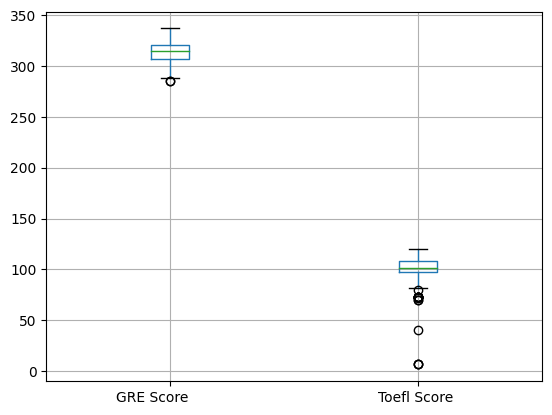

In [ ]:
df.boxplot(column=['GRE Score        ','Toefl Score '])


<Axes: >

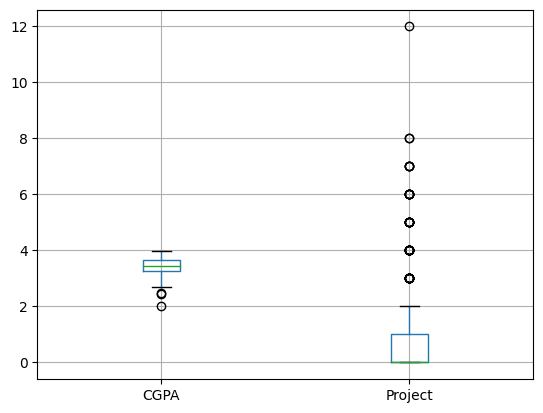

In [ ]:
df.boxplot(column=['CGPA','Project'])

<Axes: >

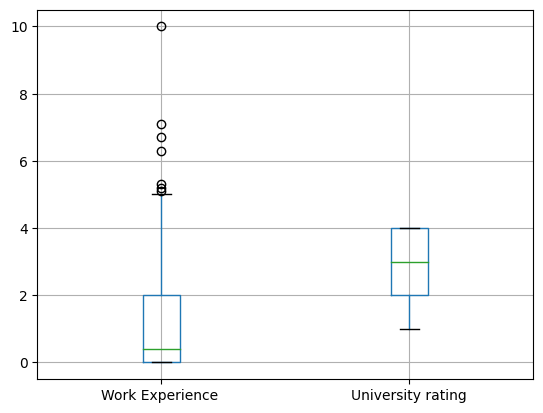

In [ ]:
df.boxplot(column=['Work Experience ', 'University rating'])

**DROPING COLUMNS**

In [ ]:
data1=df.copy()
data1.drop(['Serial No'],axis=1,inplace=True)

**CALCULATING QUANTILES FOR EACH FEATURE**

In [ ]:
Q1=data1.quantile(0.25)
Q3=data1.quantile(0.75)
IQR=Q3-Q1
print(IQR)


GRE Score              14.0
Toefl Score            11.0
CGPA                    0.4
Research                0.0
Project                 1.0
Work Experience         2.0
University Ranking    156.0
University rating       2.0
dtype: float64


<ipython-input-10-5e2b99fd5460>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data1.quantile(0.25)
<ipython-input-10-5e2b99fd5460>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data1.quantile(0.75)


**IDENTIFYING OUTLIER**

In [ ]:
df_out1 = data1[((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]
df_out1

<ipython-input-11-806671d6d471>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out1 = data1[((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]


,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
3,310,98.0,7,cse,3.78,1,1,2.0,133,3
7,308,108.0,7.5,cse,3.84,0,8,1.0,115,3
9,305,100.0,7,cse,3.68,1,0,0.6,299,2
20,306,95.0,6.5,cse,2.00,0,0,5.0,219,2
41,309,98.0,7,cse,3.55,0,6,0.7,89,4
...,...,...,...,...,...,...,...,...,...,...
350,315,107.0,7.5,cse,3.58,1,1,1.6,60,4
351,317,114.0,8,cse,3.68,2,4,0.3,60,4
357,285,98.0,7,cse,3.20,1,3,0.0,209,2
374,310,112.0,8,ds,3.62,0,6,1.0,58,4


**REMOVING OUTLIERS**

In [ ]:
df_out=data1[~((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]
data=df_out.copy()
print(data.shape)
data

(295, 10)


<ipython-input-12-a3b1278bca21>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out=data1[~((data1 < (Q1 - 2.5 * IQR)) | (data1 > (Q3 + 2.5 * IQR))).any(axis=1)]


,GRE Score,Toefl Score,Ielts Score,Department,CGPA,Research,Project,Work Experience,University Ranking,University rating
0,299,105.0,7.5,cse,3.74,0,1,3.0,250,2
1,303,98.0,7,cse,3.68,0,0,0.0,250,2
2,300,98.0,7,cse,3.68,0,0,1.0,250,2
4,306,98.0,7,cse,3.00,0,3,1.0,133,3
5,311,85.0,6.5,cse,3.36,0,0,0.0,133,3
...,...,...,...,...,...,...,...,...,...,...
380,323,105.0,7.5,cse,3.78,0,0,0.0,67,4
381,320,105.0,7.5,cse,3.65,0,0,3.0,67,4
382,317,114.0,8,cse,3.81,0,1,2.0,67,4
383,324,94.0,6.5,cse,3.68,0,0,2.5,67,4


**UNIVARIATE ANALYSIS**

**Level ENCODER**

**preprocessing data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Department']=lc.fit_transform(data['Department'])
data['Ielts Score']=lc.fit_transform(data['Ielts Score'])




In [ ]:
x=data.drop(['University rating'],axis=1)
y=data['University rating']

x.shape,y.shape


((385, 9), (385,))

In [ ]:
data.dtypes

GRE Score               int64
Toefl Score           float64
Ielts Score             int64
Department              int64
CGPA                  float64
Research                int64
Project                 int64
Work Experience       float64
University Ranking      int64
University rating       int64
dtype: object

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42)

In [ ]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x= scaler.fit_transform(test_x)

**MODEL SELECTION AND TRAINING**

In [ ]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae


In [ ]:

lr=LR()


In [ ]:

lr.fit(train_x,train_y)

LinearRegression()

In [ ]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('tst mean absolute error for training data ', k)

tst mean absolute error for training data  0.2678103685397895


In [ ]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('tst mean absolute error for training data ', k)

tst mean absolute error for training data  0.269069242927532


**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_train=lr.predict(train_x)
train_score=np.sqrt(mean_squared_error(train_y,pred_train))
print(train_score)

0.3006224393355957


In [ ]:
pred_test=lr.predict(test_x)
test_score=np.sqrt(mean_squared_error(test_predict,test_y))
print(test_score)

0.3140018136324886


In [ ]:
print('training score :',train_score)
print('validation score :',test_score)

training score : 0.3006224393355957
validation score : 0.3140018136324886


In [ ]:
test=lr.score(test_x,test_y)*100
train=lr.score(train_x,train_y)*100
print("accuracy on train set:",train)
print("accuracy on test set:",test)

accuracy on train set: 90.72621804719302
accuracy on test set: 90.6199108240174


**Decesion Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(train_x, train_y)
y_predict = dec_tree.predict(test_x)
dec_tree_score = (dec_tree.score(test_x, test_y))*100
dec_tree_score

96.14315496872828

In [ ]:
!pip install interpret
!pip install lime
!pip install shap
!pip install yellowbrick
!pip install pdpbox
from sklearn.ensemble import RandomForestRegressor
from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ExplainableBoostingRegressor
from interpret.perf import RegressionPerf
from lime.lime_tabular import LimeTabularExplainer

from sklearn.ensemble import RandomForestRegressor
from lime.lime_tabular import LimeTabularExplainer

forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(train_x, train_y)

explainer = LimeTabularExplainer(training_data=train_x,
                                mode='regression',
                                training_labels=train_y,
                                random_state=0)

instance_idx = 0
exp = explainer.explain_instance(test_x[instance_idx],
                                 predict_fn=forest.predict,
                                 num_features=len(train_x[0]))


exp.show_in_notebook(show_table=True, show_all=False)


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(train_x, train_y)
y_predict = forest.predict(test_x)
forest_score = (forest.score(test_x, test_y))*100
forest_score

96.09438659767171

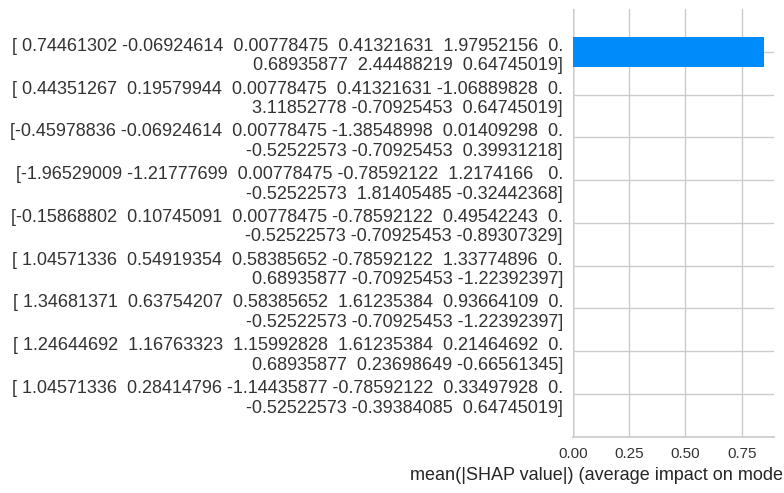

In [ ]:
!pip install shap
import shap
import yellowbrick as yb
!pip install pdpbox
from pdpbox import pdp
explainer_shap = shap.Explainer(forest)
shap_values_test = explainer_shap.shap_values(test_x)


shap_values_train = explainer_shap.shap_values(train_x)

df_shap_test = pd.DataFrame(shap_values_test)
df_shap_train = pd.DataFrame(shap_values_train)

shap.summary_plot(shap_values_test, test_x, feature_names=test_x, plot_type="bar")

plt.show()


(9,)


The RF predicted: 4.0
[3.09016865]


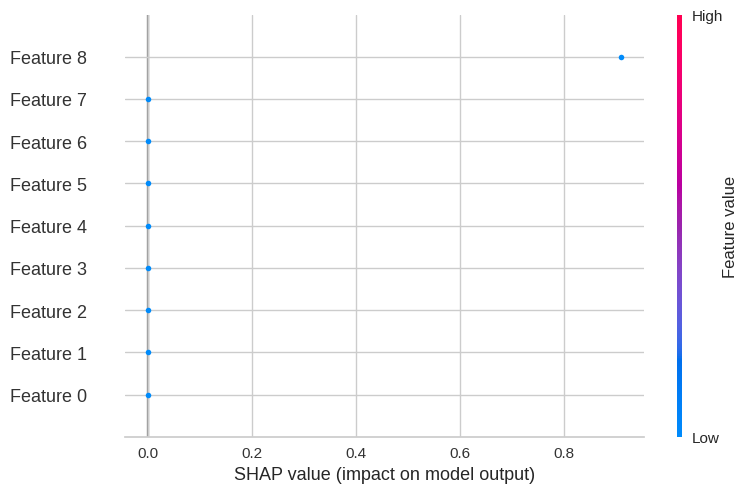

In [ ]:
import shap
import numpy as np

explainer = shap.TreeExplainer(forest)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(test_x[start_index:end_index])
test_x[start_index:end_index]

# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values
shap.initjs()
# Force plot
prediction = forest.predict(test_x[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
print(explainer.expected_value)
shap.force_plot(explainer.expected_value[0], shap_values[0], test_x[start_index:end_index])


# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, test_x[start_index:end_index])


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['University rating'])
y = data['University rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {mae}')



Epoch 1/50
6/6 [==============================] - 4s 205ms/step - loss: 10.2793 - mae: 3.0636 - val_loss: 8.3402 - val_mae: 2.7095
Epoch 2/50
6/6 [==============================] - 0s 44ms/step - loss: 8.1076 - mae: 2.6999 - val_loss: 6.5531 - val_mae: 2.3713
Epoch 3/50
6/6 [==============================] - 0s 34ms/step - loss: 6.2649 - mae: 2.3497 - val_loss: 5.0627 - val_mae: 2.0508
Epoch 4/50
6/6 [==============================] - 0s 49ms/step - loss: 4.7345 - mae: 1.9995 - val_loss: 3.7962 - val_mae: 1.7451
Epoch 5/50
6/6 [==============================] - 0s 45ms/step - loss: 3.4537 - mae: 1.6701 - val_loss: 2.7404 - val_mae: 1.4451
Epoch 6/50
6/6 [==============================] - 0s 53ms/step - loss: 2.4466 - mae: 1.3605 - val_loss: 1.9287 - val_mae: 1.1858
Epoch 7/50
6/6 [==============================] - 0s 38ms/step - loss: 1.7246 - mae: 1.1139 - val_loss: 1.3732 - val_mae: 0.9653
Epoch 8/50
6/6 [==============================] - 0s 34ms/step - loss: 1.2916 - mae: 0.9494 - v

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

path = path ="/content/drive/MyDrive/greproject/trial.csv"
data = pd.read_csv(path)
data = data.drop('Serial No', axis=1)

lc = LabelEncoder()
data['Department'] = lc.fit_transform(data['Department'])
data['Ielts Score'] = lc.fit_transform(data['Ielts Score'])

X = data.drop('University rating', axis=1)
y = data['University rating']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stopping])


_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

_, accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on train Set: {accuracy * 100:.2f}%')


model.save('/content/drive/MyDrive/greproject/improved_university_rating_classification_model.h5')

np.save('/content/drive/MyDrive/greproject/label_encoder.npy', label_encoder.classes_)


np.save('/content/drive/MyDrive/greproject/scaler_mean.npy', scaler.mean_)


np.save('/content/drive/MyDrive/greproject/scaler_scale.npy', scaler.scale_)


Epoch 1/100
16/16 [==============================] - 2s 19ms/step - loss: 1.4283 - accuracy: 0.2927 - val_loss: 1.1912 - val_accuracy: 0.6452
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1.1640 - accuracy: 0.5488 - val_loss: 1.0322 - val_accuracy: 0.6290
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 1.0062 - accuracy: 0.5854 - val_loss: 0.9221 - val_accuracy: 0.6290
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.9265 - accuracy: 0.6260 - val_loss: 0.8454 - val_accuracy: 0.6452
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8422 - accuracy: 0.6626 - val_loss: 0.7876 - val_accuracy: 0.6774
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7868 - accuracy: 0.6789 - val_loss: 0.7448 - val_accuracy: 0.7097
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.7358 - val_loss: 0.7030 - val_accuracy: 0.7097
Epoch 8/100


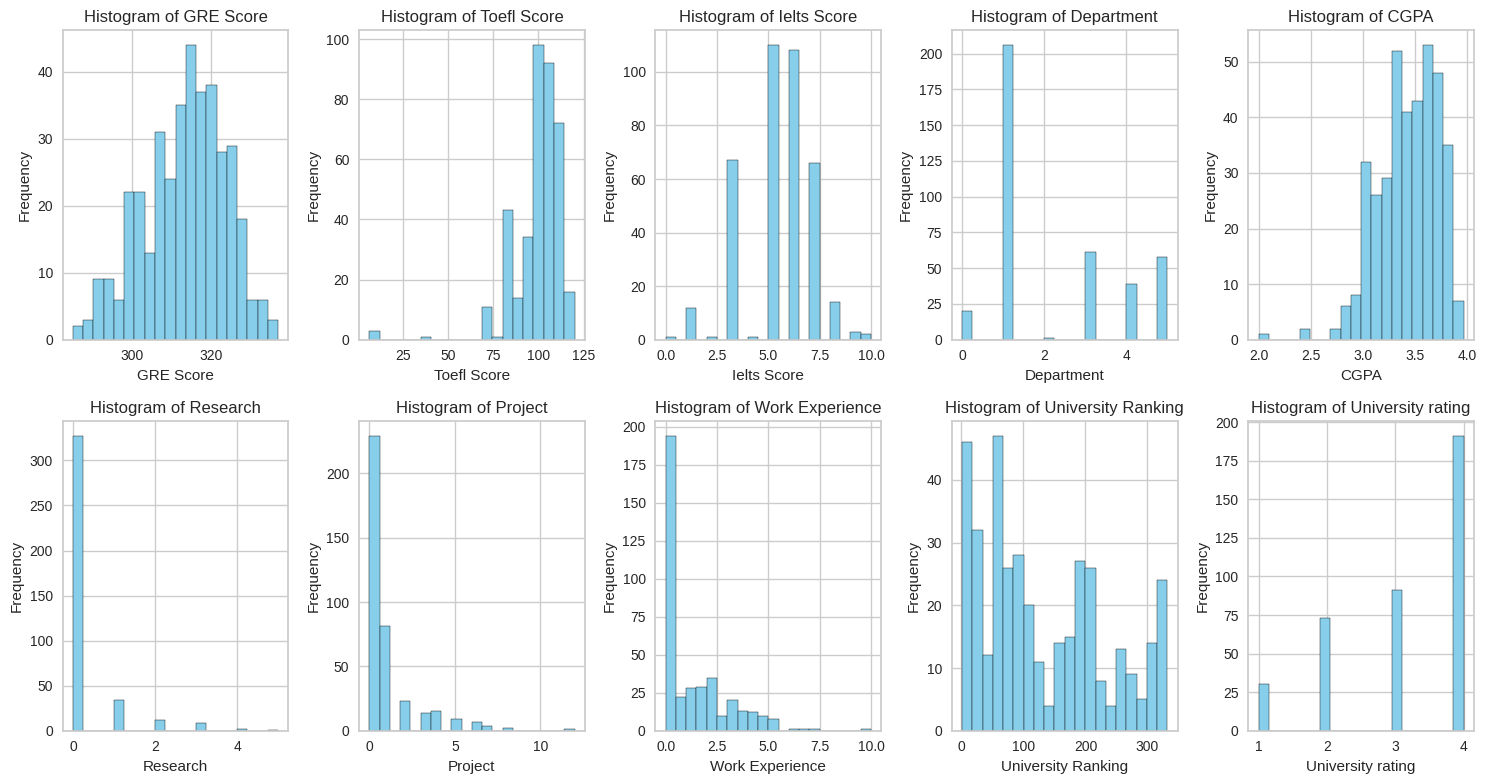

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


selected_features = ['GRE Score', 'Toefl Score', 'Ielts Score', 'Department', 'CGPA', 'Research', 'Project', 'Work Experience', 'University Ranking', 'University rating']

data.columns = data.columns.str.strip()


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))


axes = axes.flatten()


for i, feature in enumerate(selected_features):
    data[feature].plot(kind='hist', ax=axes[i], bins=20, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()


plt.show()


In [ ]:
print(data['GRE Score        '].corr(data["GRE Score        "]))
print(data['GRE Score        '].corr(data["Toefl Score "]))
print(data['GRE Score        '].corr(data["Ielts Score"]))
print(data['GRE Score        '].corr(data["Department"]))
print(data['GRE Score        '].corr(data["CGPA"]))
print(data['GRE Score        '].corr(data["Research"]))
print(data['GRE Score        '].corr(data["Project"]))
print(data['GRE Score        '].corr(data["Work Experience "]))
print(data['GRE Score        '].corr(data["University Ranking"]))
print(data['GRE Score        '].corr(data["University rating"]))


KeyError: 'GRE Score        '

In [ ]:
print(data['Toefl Score '].corr(data["GRE Score        "]))
print(data['Toefl Score '].corr(data["Toefl Score "]))
print(data['Toefl Score '].corr(data["Ielts Score"]))
print(data['Toefl Score '].corr(data["Department"]))
print(data['Toefl Score '].corr(data["CGPA"]))
print(data['Toefl Score '].corr(data["Research"]))
print(data['Toefl Score '].corr(data["Project"]))
print(data['Toefl Score '].corr(data["Work Experience "]))
print(data['Toefl Score '].corr(data["University Ranking"]))
print(data['Toefl Score '].corr(data["University rating"]))

KeyError: 'Toefl Score '

In [ ]:
print(data['Ielts Score'].corr(data["GRE Score        "]))
print(data['Ielts Score'].corr(data["Toefl Score "]))
print(data['Ielts Score'].corr(data["Ielts Score"]))
print(data['Ielts Score'].corr(data["Department"]))
print(data['Ielts Score'].corr(data["CGPA"]))
print(data['Ielts Score'].corr(data["Research"]))
print(data['Ielts Score'].corr(data["Project"]))
print(data['Ielts Score'].corr(data["Work Experience "]))
print(data['Ielts Score'].corr(data["University Ranking"]))
print(data['Ielts Score'].corr(data["University rating"]))

In [ ]:
print(data['Department'].corr(data["GRE Score        "]))
print(data['Department'].corr(data["Toefl Score "]))
print(data['Department'].corr(data["Ielts Score"]))
print(data['Department'].corr(data["CGPA"]))
print(data['Department'].corr(data["Research"]))
print(data['Department'].corr(data["Project"]))
print(data['Department'].corr(data["Work Experience "]))
print(data['Department'].corr(data["University Ranking"]))
print(data['Department'].corr(data["University rating"]))


In [ ]:
print(data['Ielts Score'].corr(data["GRE Score        "]))
print(data['Ielts Score'].corr(data["Toefl Score "]))
print(data['Ielts Score'].corr(data["Ielts Score"]))
print(data['Ielts Score'].corr(data["Department"]))
print(data['Ielts Score'].corr(data["CGPA"]))
print(data['Ielts Score'].corr(data["Research"]))
print(data['Ielts Score'].corr(data["Project"]))
print(data['Ielts Score'].corr(data["Work Experience "]))
print(data['Ielts Score'].corr(data["University Ranking"]))
print(data['Ielts Score'].corr(data["University rating"]))


In [ ]:
print(data['Research'].corr(data["GRE Score        "]))
print(data['Research'].corr(data["Toefl Score "]))
print(data['Research'].corr(data["Ielts Score"]))
print(data['Research'].corr(data["Department"]))
print(data['Research'].corr(data["CGPA"]))
print(data['Research'].corr(data["Research"]))
print(data['Research'].corr(data["Project"]))
print(data['Research'].corr(data["Work Experience "]))
print(data['Research'].corr(data["University Ranking"]))
print(data['Research'].corr(data["University rating"]))


In [ ]:
print(data['Project'].corr(data["GRE Score        "]))
print(data['Project'].corr(data["Toefl Score "]))
print(data['Project'].corr(data["Ielts Score"]))
print(data['Project'].corr(data["Department"]))
print(data['Project'].corr(data["CGPA"]))
print(data['Project'].corr(data["Research"]))
print(data['Project'].corr(data["Project"]))
print(data['Project'].corr(data["Work Experience "]))
print(data['Project'].corr(data["University Ranking"]))
print(data['Project'].corr(data["University rating"]))

In [ ]:
print(data['Work Experience '].corr(data["GRE Score        "]))
print(data['Work Experience '].corr(data["Toefl Score "]))
print(data['Work Experience '].corr(data["Ielts Score"]))
print(data['Work Experience '].corr(data["Department"]))
print(data['Work Experience '].corr(data["CGPA"]))
print(data['Work Experience '].corr(data["Research"]))
print(data['Work Experience '].corr(data["Project"]))
print(data['Work Experience '].corr(data["Work Experience "]))
print(data['Work Experience '].corr(data["University Ranking"]))
print(data['Work Experience '].corr(data["University rating"]))



In [ ]:
print(data['University Ranking'].corr(data["GRE Score        "]))
print(data['University Ranking'].corr(data["Toefl Score "]))
print(data['University Ranking'].corr(data["Ielts Score"]))
print(data['University Ranking'].corr(data["Department"]))
print(data['University Ranking'].corr(data["CGPA"]))
print(data['University Ranking'].corr(data["Research"]))
print(data['University Ranking'].corr(data["Project"]))
print(data['University Ranking'].corr(data["Work Experience "]))
print(data['University Ranking'].corr(data["University Ranking"]))
print(data['University Ranking'].corr(data["University rating"]))



KeyError: 'GRE Score        '

In [ ]:
print(data['University rating'].corr(data["GRE Score        "]))
print(data['University rating'].corr(data["Toefl Score "]))
print(data['University rating'].corr(data["Ielts Score"]))
print(data['University rating'].corr(data["Department"]))
print(data['University rating'].corr(data["CGPA"]))
print(data['University rating'].corr(data["Research"]))
print(data['University rating'].corr(data["Project"]))
print(data['University rating'].corr(data["Work Experience "]))
print(data['University rating'].corr(data["University Ranking"]))
print(data['University rating'].corr(data["University rating"]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/greproject/improved_university_rating_classification_model.h5')


label_encoder = LabelEncoder()
label_encoder.classes_ = np.load('/content/drive/MyDrive/greproject/label_encoder.npy', allow_pickle=True)

scaler = StandardScaler()
scaler.mean_ = np.load('/content/drive/MyDrive/greproject/scaler_mean.npy', allow_pickle=True)
scaler.scale_ = np.load('/content/drive/MyDrive/greproject/scaler_scale.npy', allow_pickle=True)


def predict_university_rating(GRE_Score, Toefl_Score, Ielts_Score, Department, CGPA, Research, Project, Work_Experience, University_Ranking, Chance_of_Admit):

    input_data = np.array([[GRE_Score, Toefl_Score, Ielts_Score, Department, CGPA, Research, Project, Work_Experience, University_Ranking, Chance_of_Admit]])
    print(f'Input Data (Before Standardization): {input_data}')


    input_data = np.array(input_data).reshape(1, -1)

    input_data_scaled = scaler.transform(input_data)
    print(f'Input Data (After Standardization): {input_data_scaled}')

    prediction = model.predict(input_data_scaled)
    print(f'Raw Prediction: {prediction}')

    predicted_rating = label_encoder.inverse_transform([np.argmax(prediction)])
    print(f'Predicted University Ranking: {predicted_rating}')

    return predicted_rating[0]

#input:
gre_score = 310
toefl_score = 105
ielts_score = 7.5
Department='cse'
cgpa = 3.78
research = 1
project = 0
work_experience = 1


predicted_ranking = predict_university_ranking(gre_score, toefl_score, ielts_score, department, cgpa, research, project, work_experience, university_ranking, chance_of_admit)
print(f'university rating: {predicted_ranking}')
